## Ejemplo 1. Crimes

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crimes = pd.read_csv('crim_gen.tsv',sep=',',na_values=': ')
#crimes = crimes[crimes.country.isin(['ES','IT'])]
crimes.head()

,unit,iccs,country,2012,2011,2010,2009,2008,2007,2006,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993
0,NR,DBURG,AL,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NR,DBURG,AT,15479.0,15616.0,15747.0,21248.0,18648.0,20040.0,18945.0,...,12674.0,13008.0,13262.0,10111.0,11811.0,12826.0,13849.0,13721.0,14160.0,NaN
2,NR,DBURG,AU,NaN,NaN,NaN,NaN,NaN,164305.0,172025.0,...,258157.0,277158.0,275821.0,273867.0,295699.0,284974.0,269554.0,256772.0,240765.0,235634.0
3,NR,DBURG,BE,80708.0,75310.0,68548.0,69446.0,64045.0,62964.0,63615.0,...,79203.0,77330.0,83315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NR,DBURG,BG,16781.0,20272.0,24005.0,23682.0,19980.0,22208.0,23460.0,...,31639.0,36269.0,39455.0,33004.0,43830.0,85356.0,70126.0,80671.0,NaN,NaN


El primer ejercicio consistirá en determinar cómo se distribuyen las causas de crímenes en España, para más tarde comparar esta distribución con la de otros países europeos. Mostramos la distribución del último año, 2012, junto con los valores medios de todos los años disponibles:

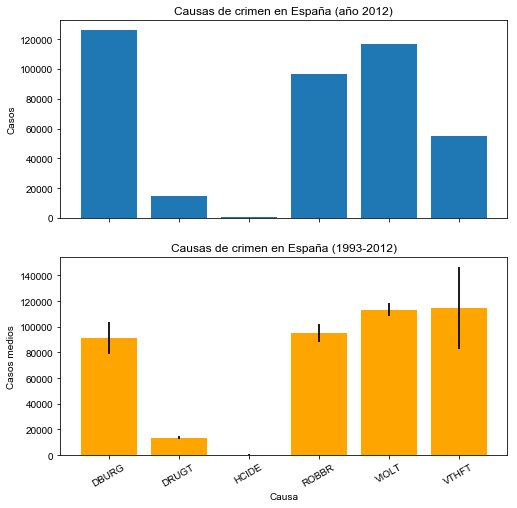

In [3]:
fig,axes=plt.subplots(2,1,figsize=(8,8),sharex=True)
plt.style.use('seaborn')
crimes_es_2012=crimes[np.logical_and(crimes.country=='ES',crimes.iccs!='TOTAL')][['iccs','2012']]
x = np.arange(len(crimes_es_2012))
y = crimes_es_2012['2012']
axes[0].bar(x,y)
plt.xticks(x, crimes_es_2012['iccs'],rotation=30)
axes[0].set_ylabel('Casos')
axes[0].set_title('Causas de crimen en España (año 2012)')

crimes_es=crimes[np.logical_and(crimes.country=='ES',crimes.iccs!='TOTAL')]
crimes_es_nums=crimes_es.loc[:,'2012':'1993']
y=np.nanmean(crimes_es_nums,axis=1)
axes[1].bar(x,y,yerr=np.std(crimes_es,axis=1),color='orange')
axes[1].set_xlabel('Causa')
axes[1].set_ylabel('Casos medios')
axes[1].set_title('Causas de crimen en España (1993-2012)')
plt.xticks(x, crimes_es['iccs'],rotation=30)
plt.show()

En la figura superior se observa cómo el número de homicidios (_HCIDE_) se ha mantenido siempre relativamente bajo, al igual que los crímenes por tráfico de drogas (_DRUGT_) en comparación con los demás. Sin embargo, las otras causas sí han experimentado cambios más o menos mayores en su frecuencia a lo largo de los años. El mayor cambio en el último año respecto a los valores históricos se observa en el número de robos de vehículos motores (_VTHFT_), que ha disminuido considerablemente. Mientras que, de media, los robos de vehículos han sido la causa de crimen más común (con una elevada varianza), la causa más frecuente en 2012 fueron los robos en domicilios (_DBURG_).

A continuación comparamos estas distribuciones con las de otros países vecinos. En este caso, los valores de cada país se han dividido por el número de casos totales en ese mismo país para hacer más justa (e interpretable) la comparación:

Text(0.5,1,'Distribución de las causas de crímenes en 2012')

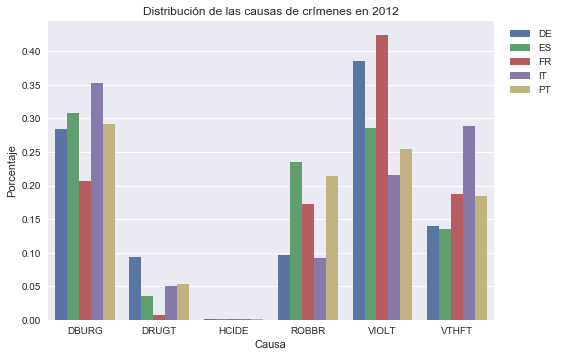

In [4]:
import seaborn as sns
crimes_2012=crimes[np.logical_and(crimes.country.isin(['ES','FR','PT','IT','DE']),crimes.iccs!='TOTAL')][['country','iccs','2012']]
crimes_2012['2012norm']=crimes_2012.groupby(['country']).transform(lambda x: (x / sum(x)))
g = sns.barplot(x='iccs', y='2012norm', hue='country', data=crimes_2012)
plt.legend(bbox_to_anchor=(1.15, 1),loc='best')
plt.xlabel('Causa')
plt.ylabel('Porcentaje')
plt.title('Distribución de las causas de crímenes en 2012')

En esta gráfica se observan que, aunque existen claras diferencias entre países, la distribución es más o menos similar en la mayoría de casos.

<function matplotlib.pyplot.show>

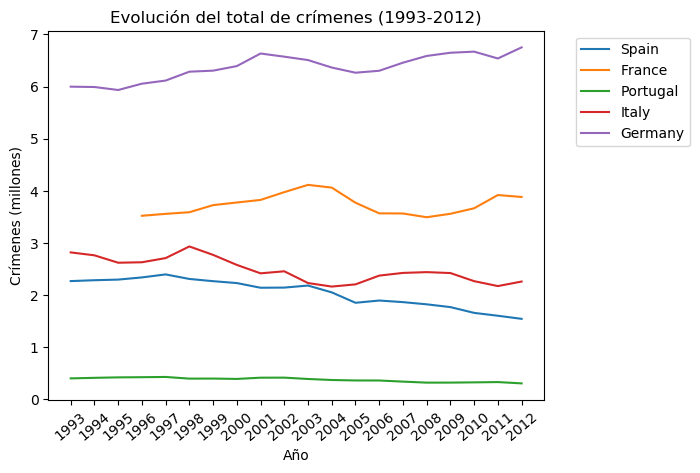

In [5]:
total_crimes=crimes.query('iccs == "TOTAL"')
paises=['Spain','France','Portugal','Italy','Germany']

claves=pd.read_csv('countrylist.csv')
code2name=claves.set_index('Code')['Name'].to_dict()
name2code=claves.set_index('Name')['Code'].to_dict()

x=np.arange(len(total_crimes.values[0][3:]))[::-1]
plt.style.use('default')
for pais in paises:
    total_crimes_pais=crimes[np.logical_and(crimes.country==name2code[pais],crimes.iccs == "TOTAL")].values[0][3:]
    total_crimes_pais=total_crimes_pais[::-1]
    plt.plot(x,total_crimes_pais/1e6,label=pais)
plt.xticks(x,crimes.columns[3:],rotation=40)
plt.tight_layout
plt.xlabel('Año')
plt.ylabel('Crímenes (millones)')
plt.title('Evolución del total de crímenes (1993-2012)')
plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
plt.tight_layout
plt.show

En la gráfica superior se aprecia cómo el número total de crímenes en España ha aumentado en los últimos años. En cuanto a los países vecinos, el número de crímenes ha aumentado ligeramente en Italia y disminuido en Alemania. Se observa también cómo ninguno de los 5 países ha ascendido o descendido nunca ningún puesto en el "ranking", claramente diferenciado. Sin embargo, estar en un puesto mayor no tiene por qué significar directamente un mayor índice de criminalidad, pues el orden en el que encontramos a los países en la gráfica coincide con el orden en cuanto al número de habitantes de cada país.

Volvemos a mostrar la gráfica superior, pero corrigiendo los valores por el número de habitantes en cada país. Hemos obtenido los datos de población para cada país y año desde https://databank.worldbank.org/data/source/population-estimates-and-projections#:

In [6]:
popu = pd.read_csv('e15c395d-e5e5-4ad5-be69-3b657753153e_Data.csv')
popu.head(6)

,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012]
0,Albania,ALB,"Population, total",SP.POP.TOTL,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0
1,Armenia,ARM,"Population, total",SP.POP.TOTL,3363098.0,3283660.0,3217342.0,3168215.0,3133086.0,3108684.0,...,3017806.0,3000612.0,2981259.0,2958500.0,2933056.0,2908220.0,2888584.0,2877311.0,2875581.0,2881922.0
2,Azerbaijan,AZE,"Population, total",SP.POP.TOTL,7495000.0,7597000.0,7685000.0,7763000.0,7838250.0,7913000.0,...,8234100.0,8306500.0,8391850.0,8484550.0,8581300.0,8763400.0,8947243.0,9054332.0,9173082.0,9295784.0
3,Belgium,BEL,"Population, total",SP.POP.TOTL,10084475.0,10115603.0,10136811.0,10156637.0,10181245.0,10203008.0,...,10376133.0,10421137.0,10478617.0,10547958.0,10625700.0,10709973.0,10796493.0,10895586.0,11047744.0,11128246.0
4,Bulgaria,BGR,"Population, total",SP.POP.TOTL,8472313.0,8443591.0,8406067.0,8362826.0,8312068.0,8256786.0,...,7775327.0,7716860.0,7658972.0,7601022.0,7545338.0,7492561.0,7444443.0,7395599.0,7348328.0,7305888.0
5,Croatia,HRV,"Population, total",SP.POP.TOTL,4640000.0,4650000.0,4669000.0,4494000.0,4572000.0,4501000.0,...,4440000.0,4439000.0,4442000.0,4440000.0,4436000.0,4434508.0,4429078.0,4417781.0,4280622.0,4267558.0


<function matplotlib.pyplot.show>

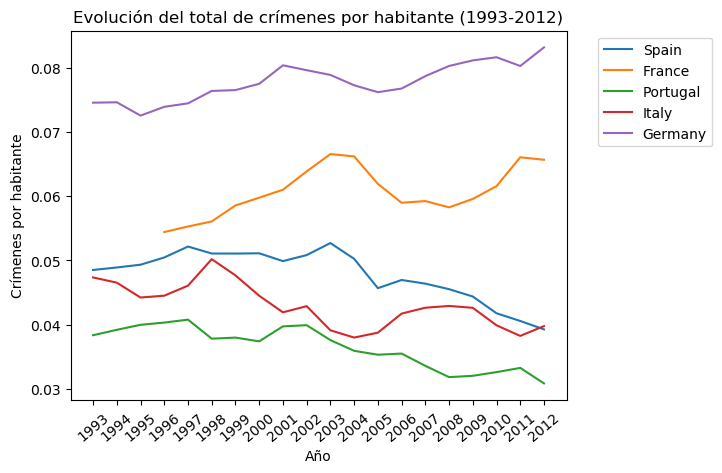

In [7]:
total_crimes=crimes.query('iccs == "TOTAL"')
paises=['Spain','France','Portugal','Italy','Germany']
x=np.arange(len(total_crimes.values[0][3:]))[::-1]

for pais in paises:
    total_crimes_pais=crimes[np.logical_and(crimes.country==name2code[pais],crimes.iccs == "TOTAL")].values[0][3:]
    total_crimes_pais=total_crimes_pais[::-1]
    popu_pais=popu[popu['Country Name']==pais].loc[:,'1993 [YR1993]':'2012 [YR2012]'].values
    plt.plot(x,total_crimes_pais/popu_pais[0],label=pais)
plt.xticks(x,crimes.columns[3:],rotation=40)
plt.tight_layout
plt.xlabel('Año')
plt.ylabel('Crímenes por habitante')
plt.title('Evolución del total de crímenes por habitante (1993-2012)')
plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
plt.tight_layout
plt.show

Podemos estudiar otras causas más concretas, como los homicidios y los crímenes violentos:

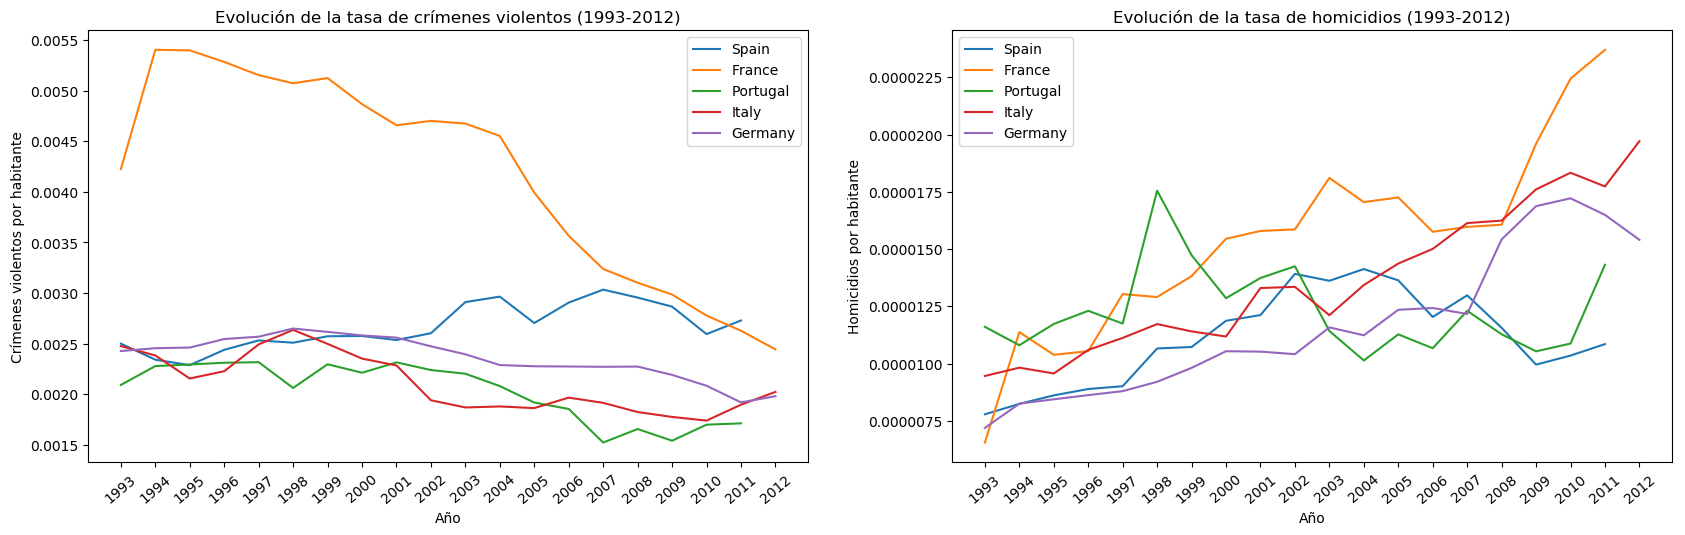

In [8]:
plt.subplot(1,2,1)

violt_crimes=crimes.query('iccs == "VIOLT"')
paises=['Spain','France','Portugal','Italy','Germany']
x=np.arange(len(violt_crimes.values[0][3:]))[::-1]

for pais in paises:
    violt_crimes_pais=crimes[np.logical_and(crimes.country==name2code[pais],crimes.iccs == "VIOLT")].values[0][3:]
    violt_crimes_pais=violt_crimes_pais[::-1]
    popu_pais=popu[popu['Country Name']==pais].loc[:,'1993 [YR1993]':'2012 [YR2012]'].values
    plt.plot(x,violt_crimes_pais/popu_pais[0],label=pais)
plt.xticks(x,crimes.columns[3:],rotation=40)
plt.tight_layout
plt.xlabel('Año')
plt.ylabel('Crímenes violentos por habitante')
plt.title('Evolución de la tasa de crímenes violentos (1993-2012)')
plt.legend(loc='best')
#plt.tight_layout
plt.show

plt.subplot(1,2,2)

hcide_crimes=crimes.query('iccs == "HCIDE"')
x=np.arange(len(hcide_crimes.values[0][3:]))[::-1]

for pais in paises:
    hcide_crimes_pais=crimes[np.logical_and(crimes.country==name2code[pais],crimes.iccs == "HCIDE")].values[0][3:]
    hcide_crimes_pais=hcide_crimes_pais[::-1]
    popu_pais=popu[popu['Country Name']==pais].loc[:,'1993 [YR1993]':'2012 [YR2012]'].values
    plt.plot(x,hcide_crimes_pais/popu_pais[0],label=pais)
plt.xticks(x,crimes.columns[3:],rotation=40)
plt.tight_layout
plt.xlabel('Año')
plt.ylabel('Homicidios por habitante')
plt.title('Evolución de la tasa de homicidios (1993-2012)')
plt.legend(loc='best')
plt.tight_layout
plt.subplots_adjust(bottom=0.1, right=2.6, top=1)

plt.show()

La conclusión más clara al observar las gráficas superiores es que, mientras que el número de crímenes violentos en Francia ha descendido desde números muy elevados hasta unos niveles en la misma línea que el resto de países vecinos, la tasa de homicidios ha aumentado desde el puesto más bajo hasta ocupar el primer puesto. Podría pensarse que ha aumentado la letalidad de los crímenes en este país, convirtiéndose en el más peligroso en las inmediaciones (aunque España tenga un número superior de crímenes violentos).

La siguiente pregunta propuesta es determinar cuáles son los cuatro países más peligrosos. Consideramos que no es correcto comparar los crímenes totales de cada país, pues este depende en gran medida del número de habitantes que tiene ese país. Para hacer estos números comparables, se han dividido los valores de cada país por su número de habitantes por año.

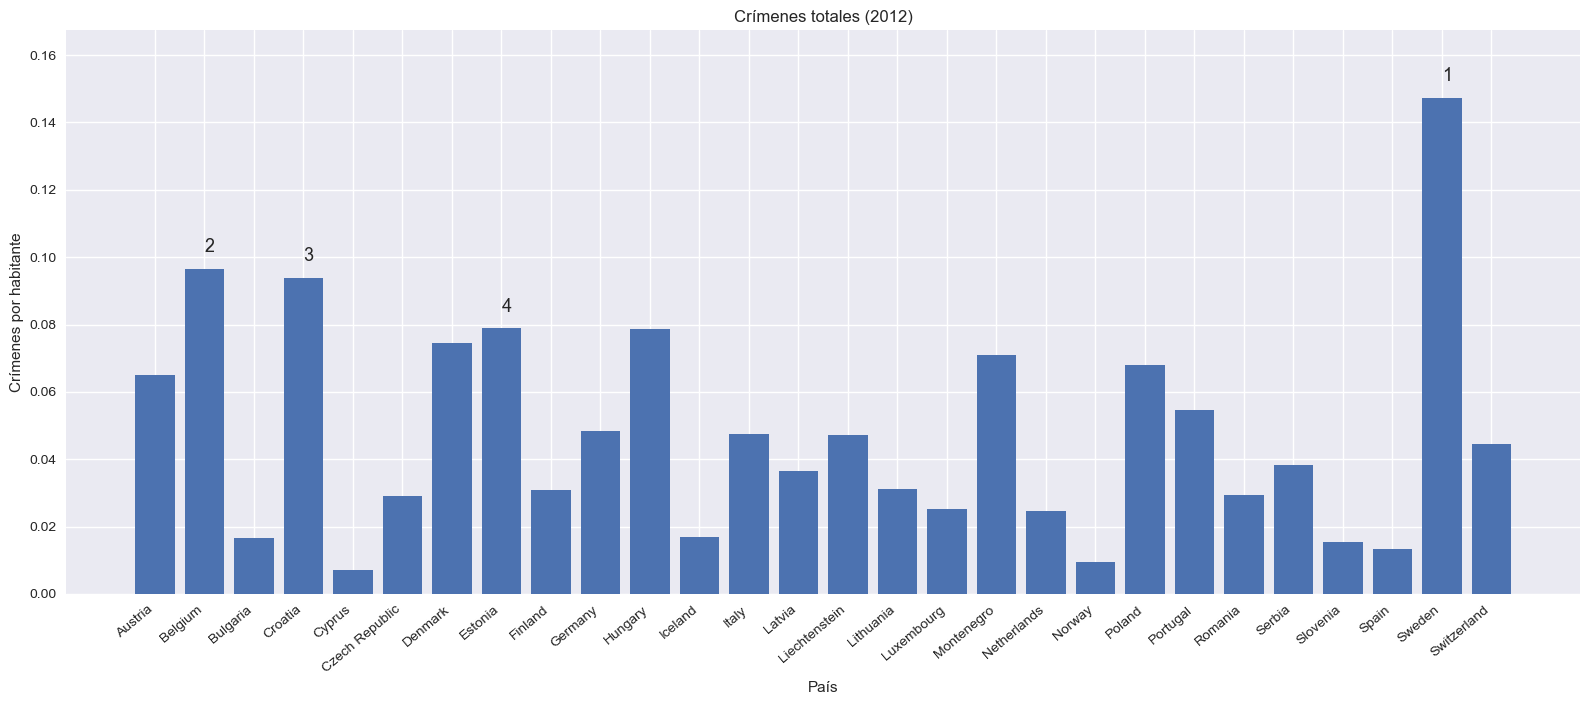

In [9]:
paises=np.unique(crimes['country'])
paises=np.setdiff1d(paises,['UKC-L','UKN','UKM','EL','US','TR','ZA','NZ','SK','MT','MK'])

total_crimes_paises=np.array([])
for pais in paises:
    total_crimes_pais=crimes[np.logical_and(crimes.country==pais,crimes.iccs == "TOTAL")]
    if (len(total_crimes_pais)>0 and (pais in code2name.keys())):
        total_crimes_pais=total_crimes_pais.values[0][3:]
        if pd.notnull(total_crimes_pais[0]):
            popu_pais=popu[popu['Country Name']==code2name[pais]].loc[:,'2012 [YR2012]'].values
            total_crimes_paises=np.append(total_crimes_paises,total_crimes_pais[0]/popu_pais)
            paises[paises==pais]=code2name[pais]
        else:
            paises=np.setdiff1d(paises,pais)
    else:
        paises=np.setdiff1d(paises,pais)

X=np.arange(len(paises))  
plt.style.use('seaborn')
plt.bar(X,total_crimes_paises)
plt.xlabel('País')
plt.xticks(X,paises,rotation=40, horizontalalignment="right")
plt.ylabel('Crímenes por habitante')
plt.ylim([0,np.max(total_crimes_paises)+0.02])
plt.title('Crímenes totales (2012)')

maximos=np.argsort(total_crimes_paises)[::-1]
for i in range(4):
    plt.text(maximos[i],total_crimes_paises[maximos[i]]+0.005,str(i+1),fontsize=13)
plt.tight_layout(rect=[0, 0, 2, 1.3])
plt.show()

En la figura superior aparece que los 4 países con más crímenes totales son, por orden, Suecia, Bosnia-Herzegovina, Alemania y Montenegro. Sin embargo, es difícil asegurar que esto signifique que estos son los países más peligrosos. Sin embargo, en el caso de Suecia, que presenta el índice más alto, se han de tener en cuenta ciertos aspectos especiales de este país. En Suecia, se añade una cuenta de un determinado crimen a las estadísticas nada más éste crimen es reportado a las autoridades, aún si luego resulta que no lo era. Además, en Suecia un mismo crimen puede ser contado múltiples veces en distintas categorías. También influye el ánimo de la población para reportar los crímenes más leves, que suman en la categoría "total". Todo esto influye en gran medida en las estadísticas, por lo que en lugar de ser el país más peligroso podría ser más bien aquell donde mejor se captura el crimen.

El criterio más común para valorar la peligrosidad de un país es la tasa de homicidios voluntarios. Mostramos una figura como la superior, pero en función de _HCIDE_ (homicidios):

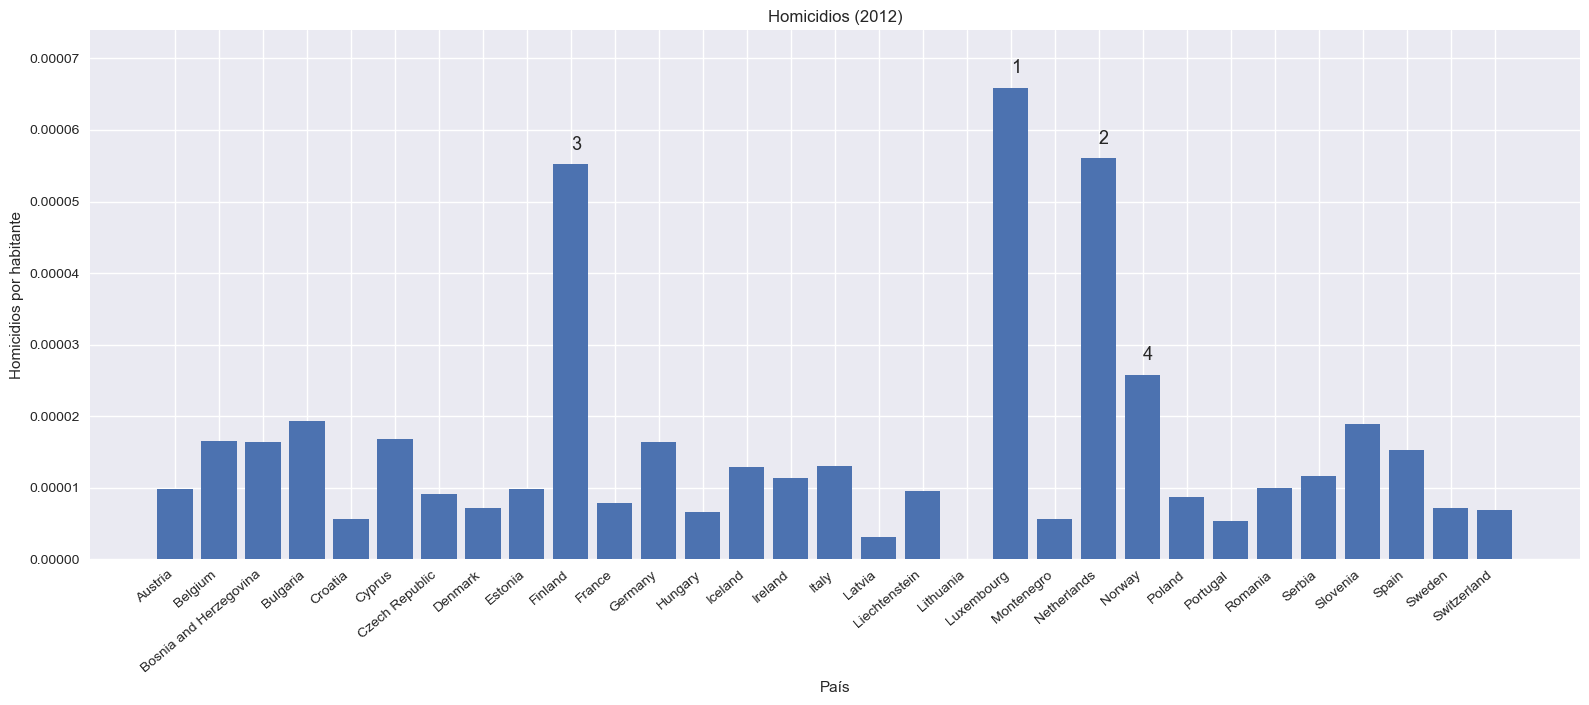

In [10]:
paises=np.unique(crimes['country'])
paises=np.setdiff1d(paises,['UKC-L','UKN','UKM','EL','US','TR','ZA','NZ','SK','MT','MK'])

total_crimes_paises=np.array([])
for pais in paises:
    total_crimes_pais=crimes[np.logical_and(crimes.country==pais,crimes.iccs == "HCIDE")]
    if (len(total_crimes_pais)>0 and (pais in code2name.keys())):
        total_crimes_pais=total_crimes_pais.values[0][3:]
        if pd.notnull(total_crimes_pais[0]):
            popu_pais=popu[popu['Country Name']==code2name[pais]].loc[:,'2012 [YR2012]'].values
            total_crimes_paises=np.append(total_crimes_paises,total_crimes_pais[0]/popu_pais)
            paises[paises==pais]=code2name[pais]
        else:
            paises=np.setdiff1d(paises,pais)
    else:
        paises=np.setdiff1d(paises,pais)

X=np.arange(len(paises))      
plt.bar(X,total_crimes_paises)
plt.xlabel('País')
plt.xticks(X,paises,rotation=40, horizontalalignment="right")
plt.ylabel('Homicidios por habitante')
plt.ylim([0,np.max(total_crimes_paises)+0.000008])
plt.title('Homicidios (2012)')
maximos=np.argsort(total_crimes_paises)[::-1]
for i in range(4):
    plt.text(maximos[i],total_crimes_paises[maximos[i]]+0.000002,str(i+1),fontsize=13)
plt.tight_layout(rect=[0, 0, 2, 1.3])
plt.show()

Al representar solamente los homicidios, que son (con más seguridad) siempre reportados y su valor por tanto menos sesgado, las conclusiones cambian radicalmente. Los cuatro países con mayor número de homicidios por habitante son Luxemburgo, Países Bajos, Finlandia y Noruega.

## Ejemplo 2. Nutrients

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
pd.options.display.max_rows = 100
db = json.load(open('./foods-2011-10-03.json'))

#print("Keys: ", db[0].keys())
#print("Nutrient 0: ",db[0]['nutrients'][0])

In [13]:
# Exploramos los nutrientes 
nutrients = pd.DataFrame(db[0]['nutrients'])

# Data Frame con la info importante asociada a los nutrientes (se filtra el resto: tags, portions,...)
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

#print("Info: ", info[:10])
pd.options.display.max_rows = 100
pd.value_counts(info.group)

# Lista de Data Frame de nutrientes
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
#print(nutrients[:10])
#nutrients.head(10)


In [14]:
nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


En primer lugar analizamos cuáles son los alimentos que tienen más magnesio. Se decide comparar la mediana de los valores de magnesio de cada grupo de comida:

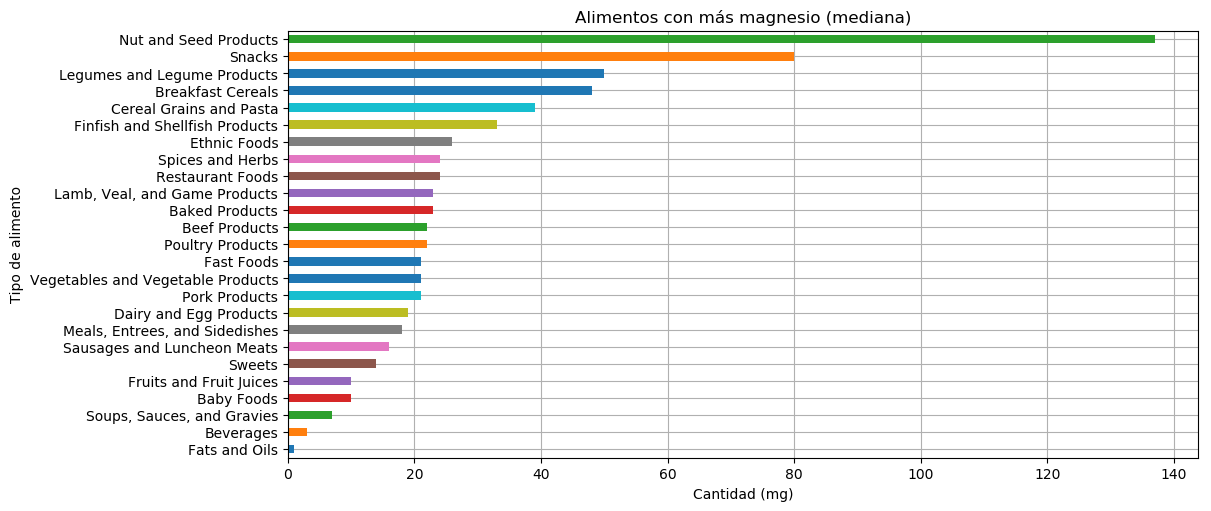

In [15]:
plt.figure(figsize=(12,5))
plt.style.use('default')
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
#result['Zinc, Zn'].sort_values().plot(kind='barh')
result['Magnesium, Mg'].sort_values().plot(kind='barh',zorder=2)
plt.title('Alimentos con más magnesio (mediana)')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Tipo de alimento')
plt.grid(zorder=0)
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

Sin embargo, si en lugar de la mediana seleccionamos los valores más altos:

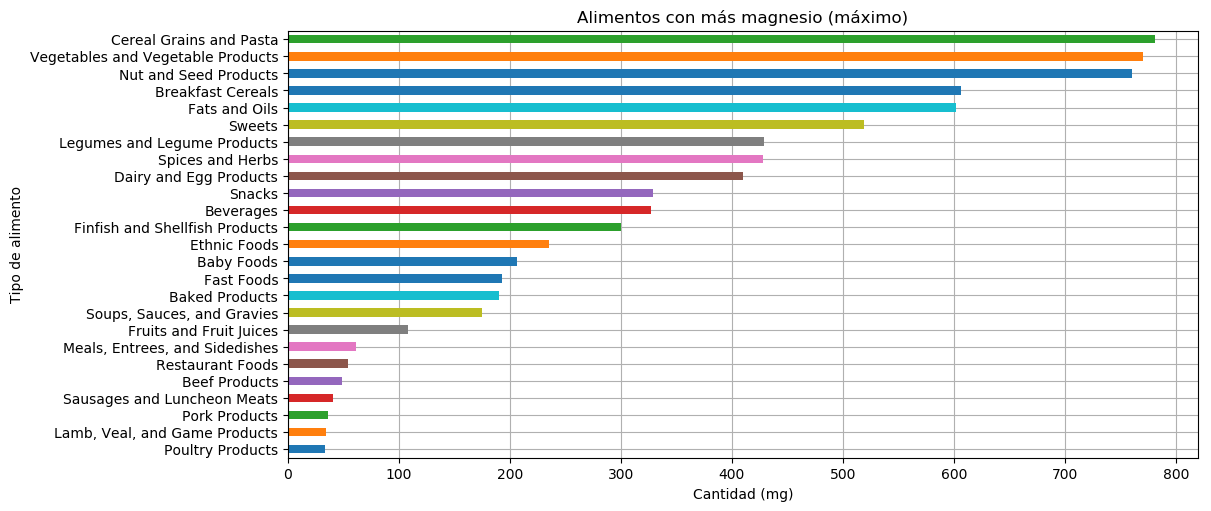

In [16]:
plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].max()
result['Magnesium, Mg'].sort_values().plot(kind='barh',zorder=2)
plt.title('Alimentos con más magnesio (máximo)')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Tipo de alimento')
plt.grid(zorder=0)
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

Se observa cómo ahora los alimentos con más magnesio son los granos integrales, las verduras, las semillas y los frutos secos. La diferencia podría radicar en que existen unas pocas verduras y granos que poseen cantidades muy elevadas de magnesio. Podemos comprobarlo representando sus distribuciones:


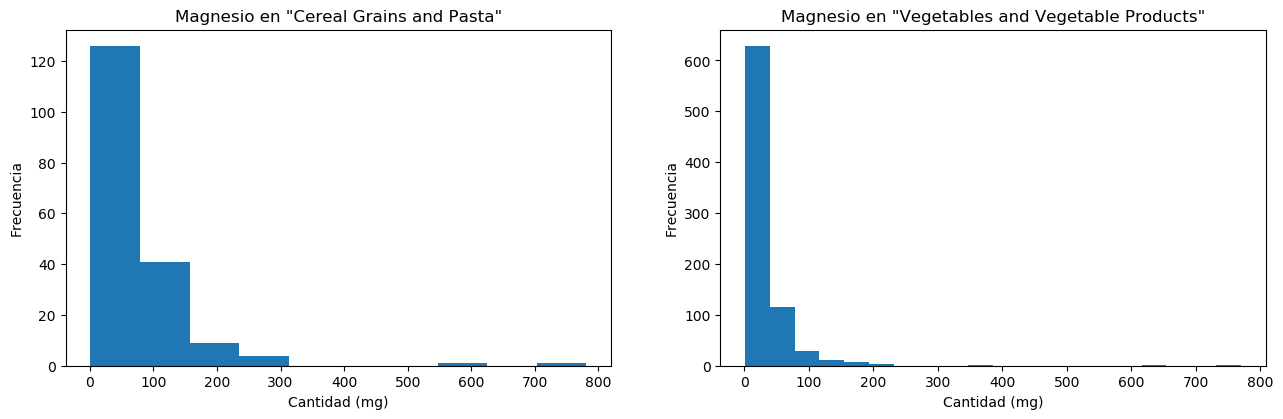

In [17]:
plt.subplot(121)
plt.hist(ndata[np.logical_and(ndata['nutrient']=='Magnesium, Mg',ndata['fgroup']=='Cereal Grains and Pasta')]['value'])
plt.title('Magnesio en "Cereal Grains and Pasta"')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Frecuencia')

plt.subplot(122)
plt.hist(ndata[np.logical_and(ndata['nutrient']=='Magnesium, Mg',ndata['fgroup']=='Vegetables and Vegetable Products')]['value'],bins=20)
plt.title('Magnesio en "Vegetables and Vegetable Products"')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Frecuencia')
plt.subplots_adjust(bottom=0.1, right=2, top=0.8)
plt.show()

Se observa cómo, efectivamente, la distribución es muy asimétrica, justificando que la mediana sea algo baja mientras que al fijarse en los valores máximos ocupen las primeras posiciones en el ránking.

Pasamos ahora a determinar qué alimentos tienen más vitaminas en general. Sin embargo, encontramos que algunos tipos de vitaminas tienen distintas unidades de medida, imposibilitando el compararlas todas al mismo tiempo. Compararemos tan solo el grupo mayoritario, es decir, las vitaminas medidas en mg. En primer lugar, sumaremos las vitaminas contenidas en cada uno de los alimentos, para luego ordenar estas cantidades por tipo de comida y compararlas, tomando como criterios la mediana y el máximo.

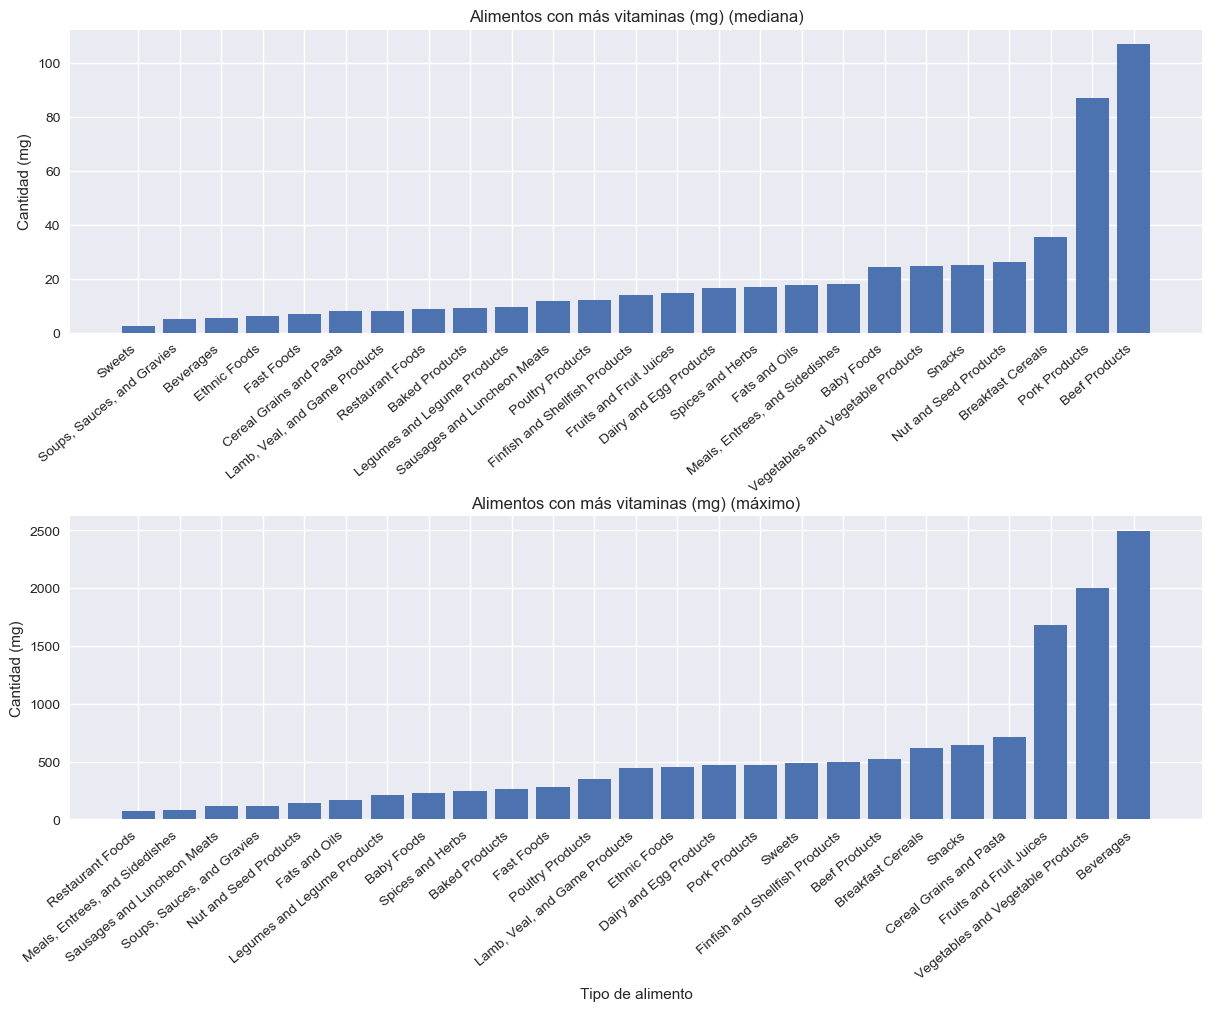

In [18]:
ndataVit=ndata[np.logical_and(ndata['nutgroup']=='Vitamins',ndata['units']=='mg')][['fgroup','food','value']]
resultFoods=ndataVit.groupby(['fgroup','food'])[['fgroup','food','value']].sum()

plt.style.use('seaborn')
plt.figure(figsize=(12,10))
plt.subplot(211)
resultGroups=resultFoods.groupby(['fgroup'])['value'].quantile(0.5).sort_values()
plt.bar(resultGroups.keys(),resultGroups)
plt.title('Alimentos con más vitaminas (mg) (mediana)')
plt.xticks(resultGroups.keys(),rotation=40,horizontalalignment="right")
plt.ylabel('Cantidad (mg)')
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)

plt.subplot(212)
resultGroups=resultFoods.groupby(['fgroup'])['value'].max().sort_values()
plt.bar(resultGroups.keys(),resultGroups)
plt.title('Alimentos con más vitaminas (mg) (máximo)')
plt.xlabel('Tipo de alimento')
plt.xticks(resultGroups.keys(),rotation=40,horizontalalignment="right")
plt.ylabel('Cantidad (mg)')
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)

plt.show()

Se ve de nuevo cómo los resultados ni siquiera son similares al usar distintos criterios. Comprobamos de nuevo que ésto se debe a que las bebidas, zumos y verduras tienen distribuciones muy asimétricas:

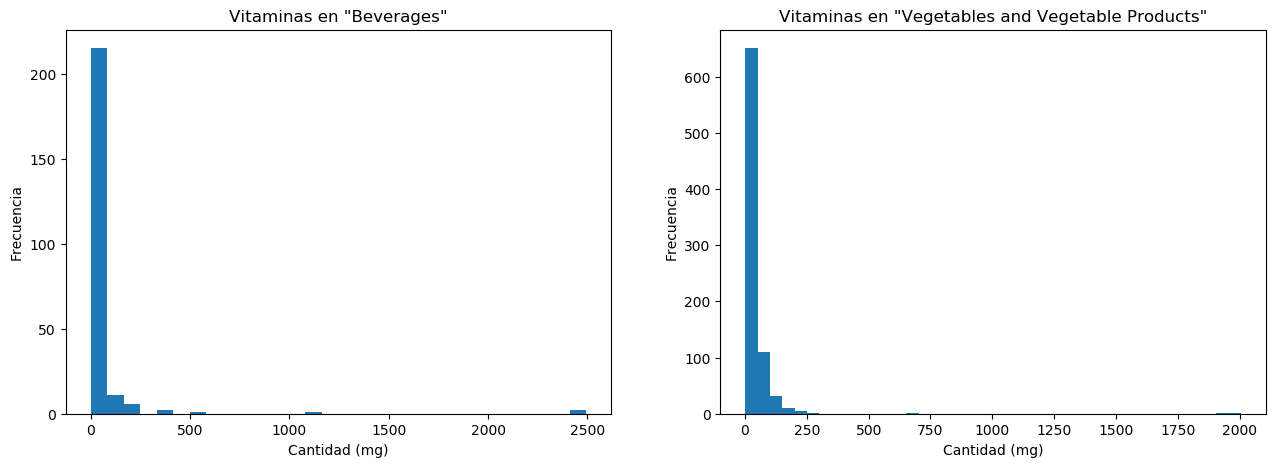

In [19]:
plt.style.use('default')
plt.subplot(121)
result=resultFoods.query('fgroup=="Beverages"')[['value']].values
plt.hist(result,bins=30)
plt.title('Vitaminas en "Beverages"')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Frecuencia')

plt.subplot(122)
result=resultFoods.query('fgroup=="Vegetables and Vegetable Products"')[['value']].values
plt.hist(result,bins=40)
plt.title('Vitaminas en "Vegetables and Vegetable Products"')
plt.xlabel('Cantidad (mg)')
plt.ylabel('Frecuencia')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

Por tanto, la comparación quizá resulte más informativa al utilizar un gráfico de violines donde quede clara esta situación:

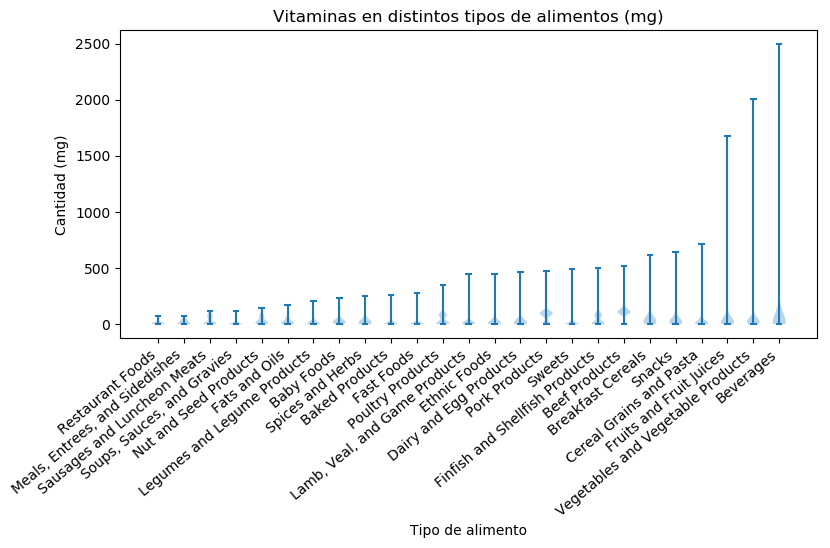

In [20]:
lista=[]
for tipo in resultGroups.keys():
    lista.append(resultFoods.query('fgroup=="'+tipo+'"')[['value']].values)

plt.figure(figsize=(9,4))
plt.violinplot(lista);
plt.title('Vitaminas en distintos tipos de alimentos (mg)')
plt.xlabel('Tipo de alimento')
plt.xticks(range(1,26),resultGroups.keys(),rotation=40,horizontalalignment="right")
plt.ylabel('Cantidad (mg)')
plt.show()

La última pregunta propuesta consiste en comparar los nutrientes de los productos cárnicos con los vegetales. En primer lugar, para poder representar todos los nutrientes juntos, convertimos todos aquellos cuyas unidades estén en gramos a miligramos:

In [21]:
ndata.loc[ndata['units']=='g','value']=ndata[ndata['units']=='g']['value']*1000;

Separamos los productos cárnicos de los vegetales y representamos cómo se distribuyen los nutrientes en cada caso. Para que el resultado sea fácilmente entendible, se han agrupado todas las vitaminas en un conjunto "Vitaminas", al igual que con los "Minerales" y "Aminoácidos".

In [22]:
ndict=ndata.set_index('nutrient')['nutgroup'].to_dict()
lista_agrupar=['Vitamins','Elements']
for nutr in np.unique(ndata['nutrient']):
    if (ndict[nutr] in lista_agrupar):
        ndata.loc[ndata['nutrient']==nutr,'nutrient']=ndict[nutr]
        
ndata.loc[ndata['nutrient'].str.startswith('Fatty acids,'),'nutrient']='Fatty acids'
ndata.loc[ndata['nutrient']=='Sugars, total','nutrient']='Sugars'
ndata.loc[ndata['nutrient']=='Carbohydrate, by difference','nutrient']='Carbohydrate'

In [23]:
nuts_interes=['Vitamins','Protein','Elements','Fatty acids','Cholesterol','Water','Sugars','Carbohydrate']
ndata=ndata[ndata['nutrient'].isin(nuts_interes)]

meat=ndata[ndata['fgroup'].isin(['Beef Products','Pork Products'])]
vegg=ndata[ndata['fgroup'].isin(['Vegetables and Vegetable Products'])]

meat=meat.groupby(['nutrient'])['value'].sum()
vegg=vegg.groupby(['nutrient'])['value'].sum()

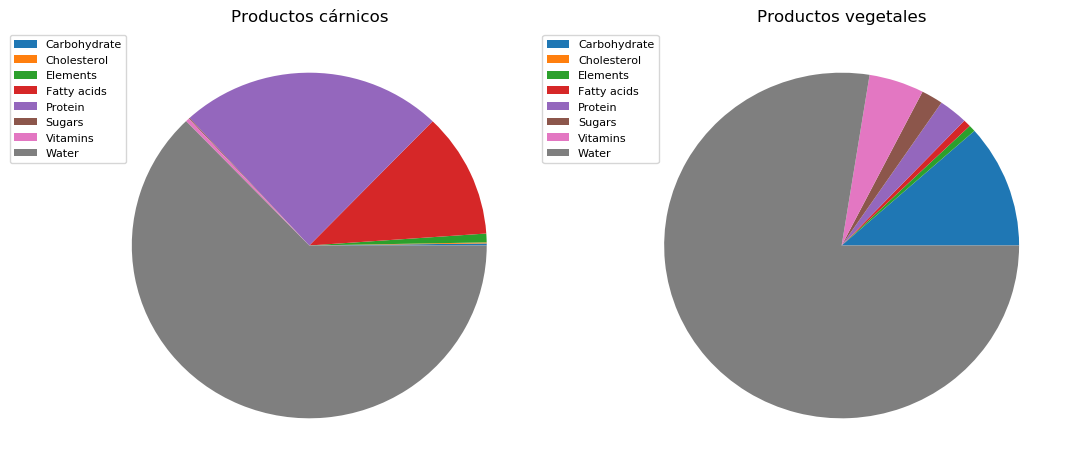

In [24]:
plt.subplot(121)
plt.style.use('default')
plt.pie(meat);
plt.title('Productos cárnicos')
plt.legend(labels=meat.keys(), loc='best', bbox_to_anchor=(0.1,1),
           fontsize=8)

plt.subplot(122)
plt.style.use('default')
plt.pie(vegg);
plt.title('Productos vegetales')
plt.legend(labels=vegg.keys(), loc='best', bbox_to_anchor=(0.1,1),
           fontsize=8)
plt.subplots_adjust(bottom=0.1, right=1.65, top=1)
plt.show()

En la figura superior se observa cómo, tanto para lo productos cárnicos como vegetales, el componente principal es el agua, siendo el porcentaje significativamente mayor en los vegetales. Para poder observar mejor cómo se distribuyen el resto de nutrientes, eliminamos el agua del análisis:

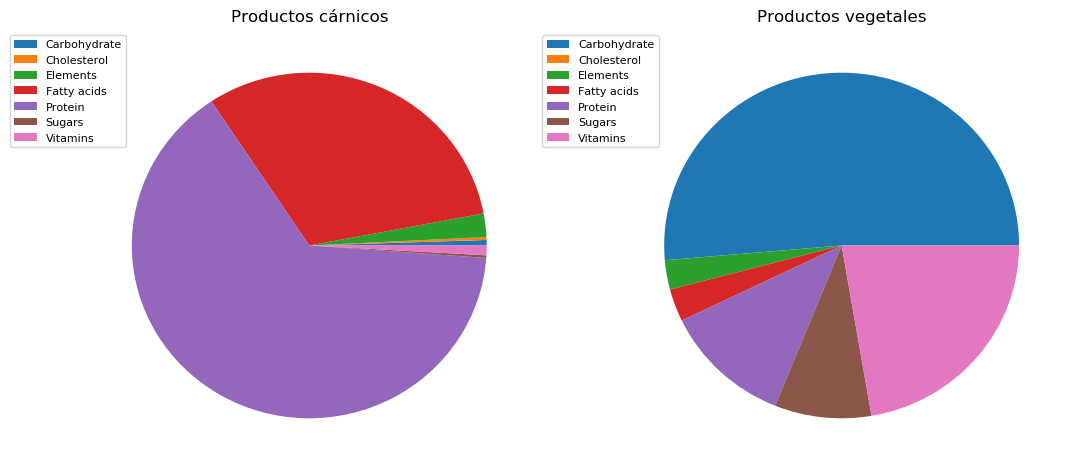

In [25]:
nuts_interes=['Vitamins','Protein','Elements','Fatty acids','Cholesterol','Sugars','Carbohydrate']
ndata=ndata[ndata['nutrient'].isin(nuts_interes)]

meat=ndata[ndata['fgroup'].isin(['Beef Products','Pork Products'])]
vegg=ndata[ndata['fgroup'].isin(['Vegetables and Vegetable Products'])]

meat=meat.groupby(['nutrient'])['value'].sum()
vegg=vegg.groupby(['nutrient'])['value'].sum()

plt.subplot(121)
plt.style.use('default')
plt.pie(meat);
plt.title('Productos cárnicos')
plt.legend(labels=meat.keys(), loc='best', bbox_to_anchor=(0.1,1),
           fontsize=8)

plt.subplot(122)
plt.style.use('default')
plt.pie(vegg);
plt.title('Productos vegetales')
plt.legend(labels=vegg.keys(), loc='best', bbox_to_anchor=(0.1,1),
           fontsize=8)
plt.subplots_adjust(bottom=0.1, right=1.65, top=1)
plt.show()

Aquí se observa claramente cómo, mientras que en la carne abundan principalmente las proteínas y las grasas, en los vegetales abundan los carbohidratos, vitaminas, azúcares y también proteínas. Además, se observa que los vegetales presentan muchas menos grasas y nada de colesterol, mientras que la cantidad de minerales es muy similar en ambos tipos de alimento.

Podemos hacer un análisis más detallado de los productos vegetales y cárnicos:

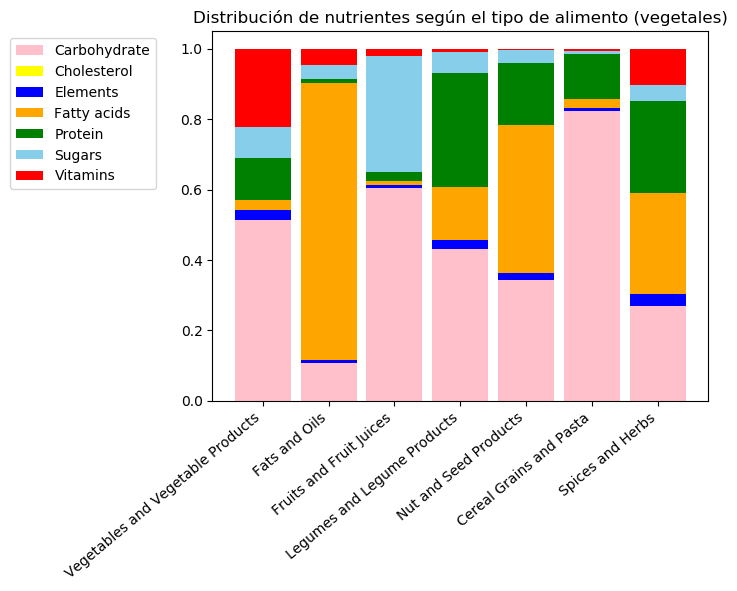

In [26]:
grupos=['Vegetables and Vegetable Products','Fats and Oils','Fruits and Fruit Juices','Legumes and Legume Products','Nut and Seed Products','Cereal Grains and Pasta','Spices and Herbs']

data_all=[]
for grupo in grupos:
    data=ndata[ndata['fgroup']==grupo]
    data=data.groupby(['nutrient'])['value'].sum()
    data_all.append(np.array(data))

data_all=np.array(data_all)
for i in range(len(grupos)):
    data_all[i,:]=data_all[i,:]/sum(data_all[i,:])

x = range(len(grupos))
colores=['pink','yellow','blue','orange','green','skyblue','red']
bottom=0
plt.style.use('default')
for i in range(len(nuts_interes)):
    data_all[:,i]=data_all[:,i]
    plt.bar(x, data_all[:,i], color=colores[i], bottom=bottom, width=0.85)
    bottom=bottom+data_all[:,i]
plt.title('Distribución de nutrientes según el tipo de alimento (vegetales)')
plt.xticks(x,grupos,rotation=40,horizontalalignment="right")
plt.legend(data.keys(),bbox_to_anchor=(-0.1,1))
plt.show()


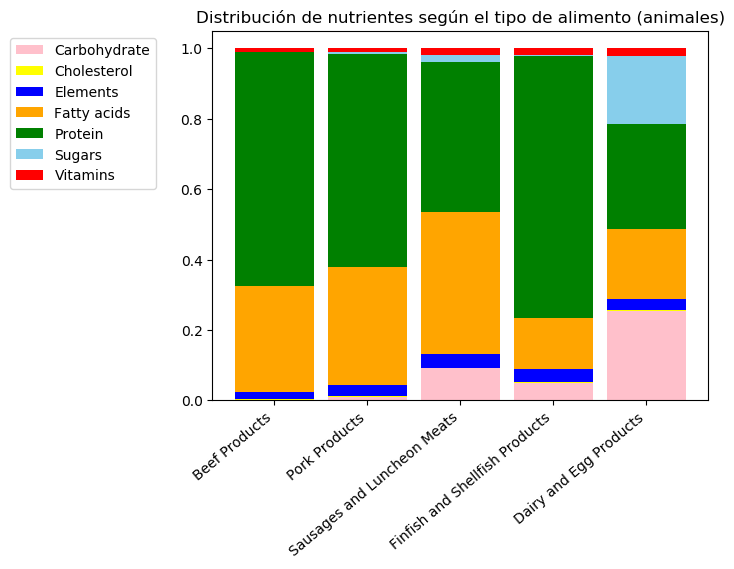

In [27]:
grupos=['Beef Products','Pork Products','Sausages and Luncheon Meats','Finfish and Shellfish Products','Dairy and Egg Products']

data_all=[]
for grupo in grupos:
    data=ndata[ndata['fgroup']==grupo]
    data=data.groupby(['nutrient'])['value'].sum()
    data_all.append(np.array(data))

data_all=np.array(data_all)
for i in range(len(grupos)):
    data_all[i,:]=data_all[i,:]/sum(data_all[i,:])

x = range(len(grupos))
colores=['pink','yellow','blue','orange','green','skyblue','red']
bottom=0
plt.style.use('default')
for i in range(len(nuts_interes)):
    data_all[:,i]=data_all[:,i]
    plt.bar(x, data_all[:,i], color=colores[i], bottom=bottom, width=0.85)
    bottom=bottom+data_all[:,i]
plt.title('Distribución de nutrientes según el tipo de alimento (animales)')
plt.xticks(x,grupos,rotation=40,horizontalalignment="right")
plt.legend(data.keys(),bbox_to_anchor=(-0.1,1))
plt.show()
